https://www.kaggle.com/peterwittek/wordclouds-of-titles-and-abstracts-with-n-grams
Following this tutorial


In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import string
from matplotlib import rcParams
from nltk import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk import pos_tag, sent_tokenize, word_tokenize, BigramAssocMeasures, BigramCollocationFinder, TrigramAssocMeasures, TrigramCollocationFinder
from subprocess import check_output

In [19]:
def get_bitrigrams(full_text, threshold=30):
    if isinstance(full_text, str):
        text = full_text
    else:
        text = " ".join(full_text)
    bigram_measures = BigramAssocMeasures()
    trigram_measures = TrigramAssocMeasures()
    finder = BigramCollocationFinder.from_words(text.split())
    finder.apply_freq_filter(3)
    bigrams = {" ".join(words): "_".join(words)
               for words in finder.above_score(bigram_measures.likelihood_ratio, threshold)}
    finder = TrigramCollocationFinder.from_words(text.split())
    finder.apply_freq_filter(3)
    trigrams = {" ".join(words): "_".join(words)
                for words in finder.above_score(trigram_measures.likelihood_ratio, threshold)}
    return bigrams, trigrams


def replace_bitrigrams(text, bigrams, trigrams):
    if isinstance(text, str):
        texts = [text]
    else:
        texts = text
    new_texts = []
    for t in texts:
        t_new = t
        for k, v in trigrams.items():
            t_new = t_new.replace(k, v)
        for k, v in bigrams.items():
            t_new = t_new.replace(" " + k + " ", " " + v + " ")
        new_texts.append(t_new)
    if len(new_texts) == 1:
        return new_texts[0]
    else:
        return new_texts


def process_text(text, lemmatizer, translate_table, stopwords):
    processed_text = ""
    for sentence in sent_tokenize(text):
        tagged_sentence = pos_tag(word_tokenize(sentence.translate(translate_table)))
        for word, tag in tagged_sentence:
            word = word.lower()
            if word not in stopwords:
                if tag[0] != 'V':
                    processed_text += lemmatizer.lemmatize(word) + " "
    return processed_text


def get_all_processed_texts(texts, lemmatizer, translate_table, stopwords):
    processed_texts = []
    for index, doc in enumerate(texts):
        processed_texts.append(process_text(doc, wordnet_lemmatizer, translate_table, stop))
    bigrams, trigrams = get_bitrigrams(processed_texts)
    very_processed_texts = replace_bitrigrams(processed_texts, bigrams, trigrams)
    return " ".join(very_processed_texts)

wordnet_lemmatizer = WordNetLemmatizer()
stop = set(stopwords.words('english'))
translate_table = dict((ord(char), " ") for char in string.punctuation)

In [20]:
import os
HOME = os.getcwd()
records = pd.read_csv(os.path.join(HOME, "ethics_statement_frontiers_frontiers_50_spacy.csv"))

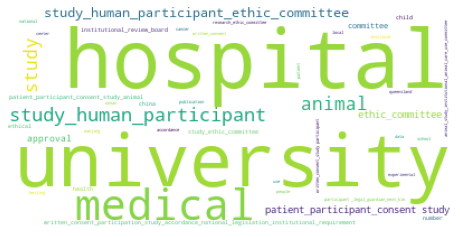

In [39]:
wordcloud = WordCloud(background_color="white").\
    generate(get_all_processed_texts(records["parsed"], wordnet_lemmatizer, translate_table, stop))
plt.figure(figsize=(8, 5))
plt.axis("off")
plt.imshow(wordcloud)

In [33]:
def use_ngrams_only(texts, lemmatizer, translate_table, stopwords):
    processed_texts = []
    for index, doc in enumerate(texts):
        processed_texts.append(process_text(doc, wordnet_lemmatizer, translate_table, stop))
    bigrams, trigrams = get_bitrigrams(processed_texts)
    indexed_texts = []
    for doc in processed_texts:
        current_doc = []
        for k, v in trigrams.items():
            c = doc.count(k)
            if c > 0:
                current_doc += [v] * c
                doc = doc.replace(k, v)
        for k, v in bigrams.items():
            current_doc += [v] * doc.count(" " + k + " ")
        indexed_texts.append(" ".join(current_doc))
    return " ".join(indexed_texts)



In [38]:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white"). generate(use_ngrams_only((records["parsed"], wordnet_lemmatizer, translate_table, stop))



SyntaxError: unexpected EOF while parsing (<ipython-input-38-88aa5f1cef6a>, line 2)